# Fiber Analysis; Modified from FiberFit Software
## software  is from [this paper](https://link.springer.com/article/10.1007/s10237-016-0776-3) and Github with original program can be viewed [here.](https://github.com/NTMatBoiseState/FiberFit/tree/master/src/fiberfit_model)
#### this software below is same as above, but it allows for bulk proccessing and provides potential for export of raw data and custom formatting of images

### Steps:  First, Import necessary Dependencies

In [9]:
import sys
!{sys.executable} -m pip install greenlet
!{sys.executable} -m pip install PyQt5
import PyQt5

ERROR: Could not find a version that satisfies the requirement PyQt4 (from versions: none)
ERROR: No matching distribution found for PyQt4
ERROR: Could not find a version that satisfies the requirement 12.7.1 (from versions: none)
ERROR: No matching distribution found for 12.7.1


In [13]:
import matplotlib
matplotlib.rcParams['backend'] = "Qt5Agg"
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

In [15]:
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

import argparse, re, os, glob, sys, pprint, itertools
import inspect

import numpy as np
# try:
#     from runtime import *
# except ImportError:
#     from smop.runtime import *

from src.fiberfit_model.helpers import debug
import numpy as np
from numpy.linalg import eig, inv
import scipy.ndimage
from pylab import *

import ipywidgets as widgets
from IPython.display import display
 
btn = widgets.Button(description='Press Me')
display(btn)
#display(QPixmap(saved_images_dir_name + "/angDist_" + ".png").scaled(300, 400, Qt.KeepAspectRatio, Qt.SmoothTransformation))
import skimage.io as io
from skimage import data
from skimage.filters import sobel 
from skimage.morphology import watershed
from skimage import feature
from skimage.color import rgb2gray
from skimage.feature import corner_harris,corner_peaks
from skimage.exposure import equalize_hist
from skimage import measure
from skimage.draw import ellipse
from skimage.measure import label, regionprops
from skimage.transform import rotate
from skimage.feature import corner_orientations
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square
from skimage.measure import regionprops
from skimage.color import label2rgb
import seaborn
import pandas
try:
     from runtime import *
except ImportError:
     from smop.runtime import *

from src.fiberfit_model.helpers import debug
import numpy as np
from numpy.linalg import eig, inv
import scipy.ndimage
from pylab import *
from os import listdir
from os.path import isfile, join
import numpy
import cv2


#test
    
import sys
import matplotlib
import numpy as np
import scipy
import scipy.ndimage
import scipy.interpolate
import scipy.optimize
import scipy.integrate
import scipy.stats
import math
import time
import glob
from pylab import *
from pandas import DataFrame
#from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
import matplotlib.pyplot as plt

from src.fiberfit_model.EllipseDirectFit import*
from src.fiberfit_model import helpers

Button(description='Press Me', style=ButtonStyle())

### Next, Input Variables 

In [19]:
## File Path with binary square images of fibers to analyze
mypath='fibers'

##Path to folder where you would like images to be saved
savepath = 'output/'
## NOTE - we can also output raw data. let me know if you would prefer that.

## Variables for settings
CO_lower = 20 #upper fiber thickness, pixels
CO_upper = 1 #lower fiber thickness, pixels
angleInc = 1 #angle increment
radStep = 0.5 #radial step size


### Now, Run the code below. Figures will be saved in specified output folder

length image 2


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


0 n
1 Index
1 n
2 Index


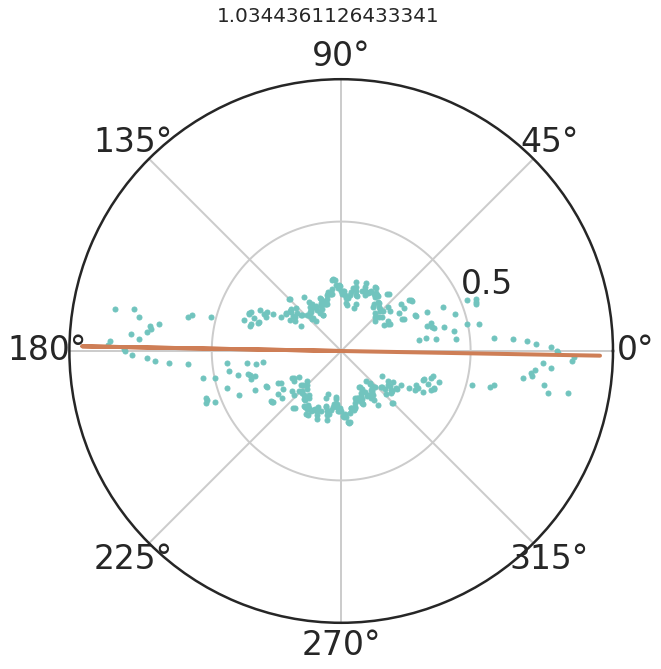

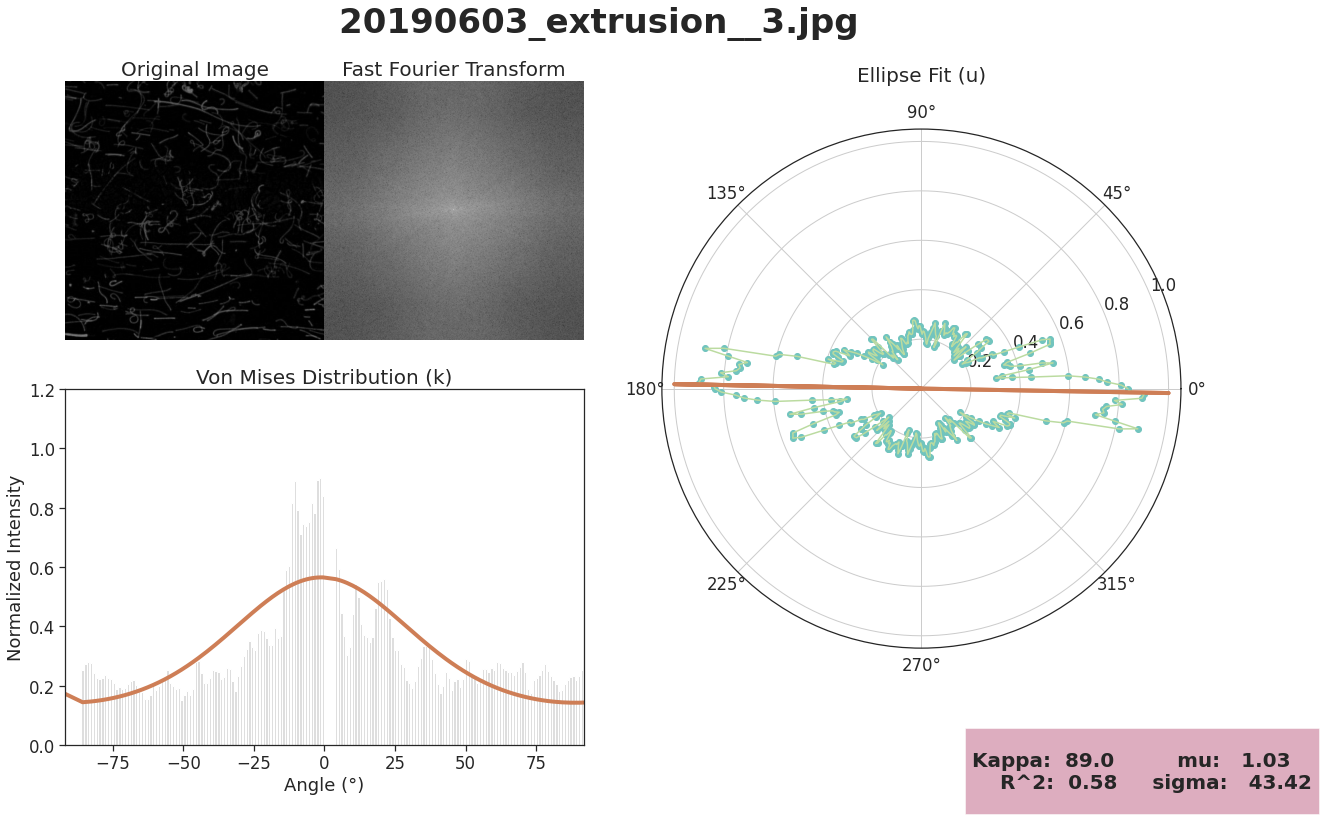

<Figure size 720x720 with 0 Axes>

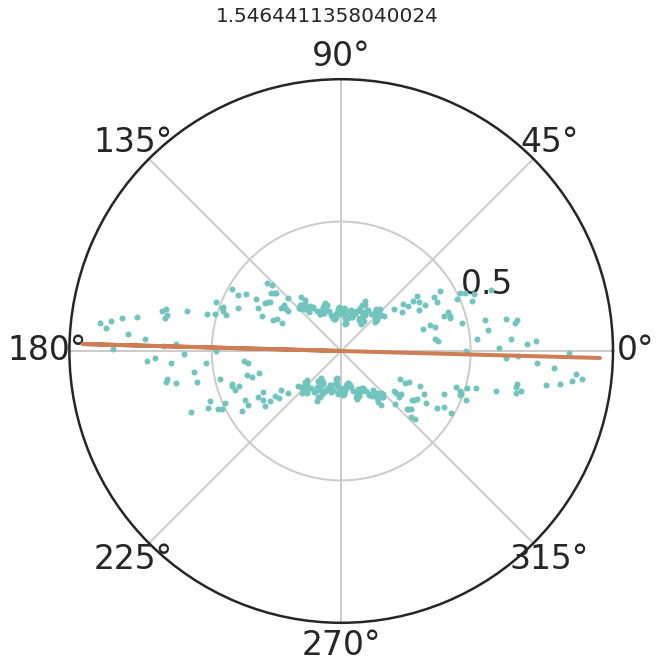

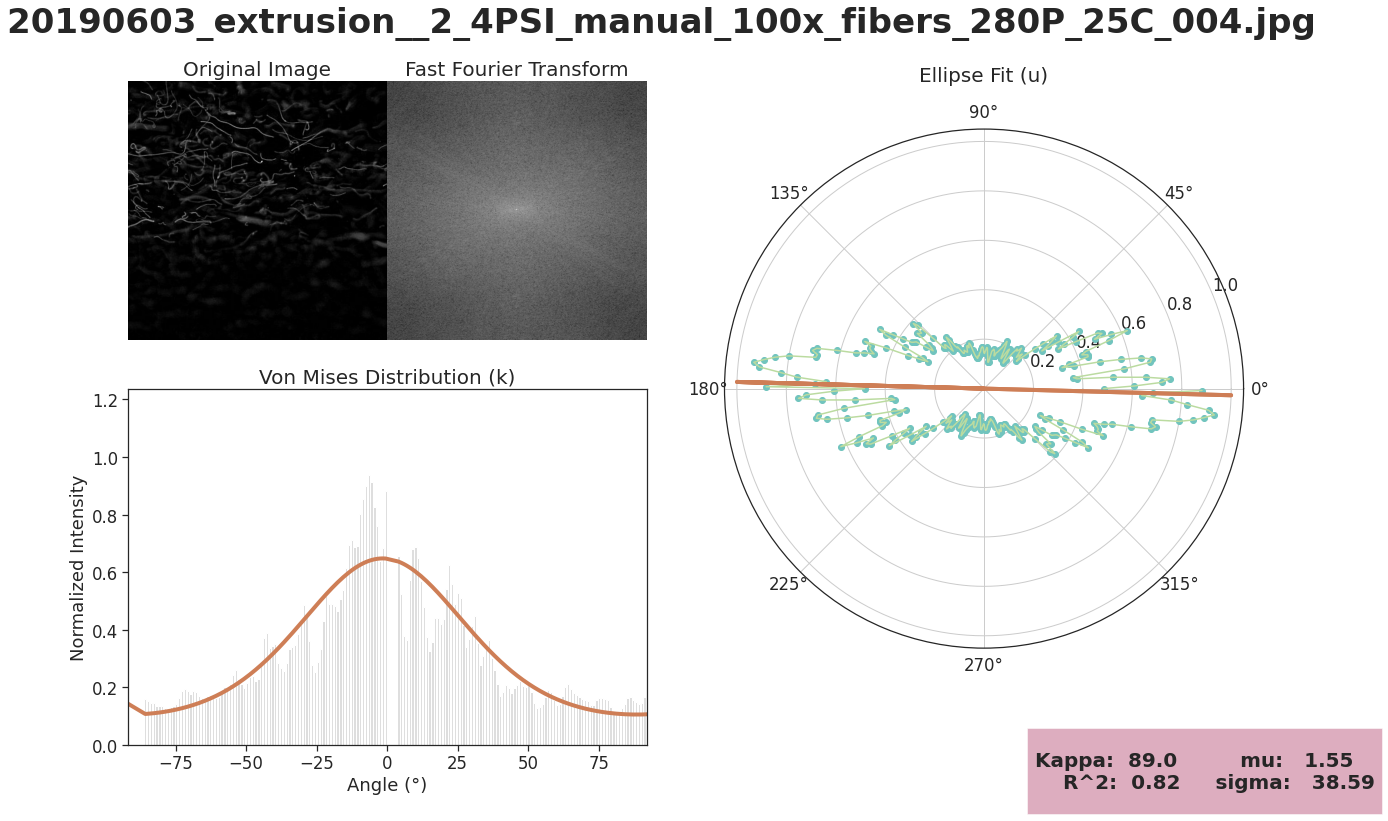

<Figure size 720x720 with 0 Axes>

In [22]:
## Upload Files
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = numpy.empty(len(onlyfiles), dtype=object)
names = numpy.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
    images[n] = cv2.imread( join(mypath,onlyfiles[n]) )
    names[n]= (onlyfiles[n])
img = numpy.empty(len(images), dtype=object)
for n in range(0,len(images)):
    img[n]= np.invert(images[n])
    
## Set up empty Matrices (can clean this up later )
ell_data_test = numpy.empty(len(img),dtype=object)
Mirtheta1RadFinal_test =numpy.empty(len(img),dtype=object)
MirnormPower_test = numpy.empty(len(img),dtype=object)
normPower_test = numpy.empty(len(img),dtype=object)
theta1RadFinal_test = numpy.empty(len(img),dtype=object)
A_test = numpy.empty(len(img),dtype=object)
centroid_test = numpy.empty(len(img),dtype=object)
t_new_test = numpy.empty(len(img),dtype=object)
im =  numpy.empty(len(img), dtype=object)
PF = numpy.empty(len(img),dtype=object)
PS = numpy.empty(len(img),dtype=object)
theta1Rad_test = numpy.empty(len(img),dtype=object)
PowerY_test = numpy.empty(len(img),dtype=object)
Mirtheta1RadFinal1_plot= numpy.empty(len(img),dtype=object)
MirnormPower_plot=numpy.empty(len(img),dtype=object)
th_plot=numpy.empty(len(img),dtype=object)
r_line_plot=numpy.empty(len(img),dtype=object)
num=0
index=num

## begin analysis
print('length image',len(img))
for n in range(0,len(img)):
    im=img[n][:,:,1] # select first image
    M= im.shape[0] #get image shape
    N1 = im.shape[1] 
    n1 = np.round(N1/ 2) - 1
    freq = np.arange(-n1, n1 + 1, 1)
    x, y = freq, freq
    
    ## Fourier Transform
    fft_result = np.fft.fft2(im)
    Fshift = np.fft.fftshift(fft_result)
    
    ## adjust to power spectrum to remove imaginary components
    magnitude_spectrum= 20*np.log(np.abs(Fshift))
    Pabs = np.abs(Fshift) ** 2
    
    M= im.shape[0]
    N1=im.shape[1]

    # shift in terms of image because power spectrum is the mirroR of lines so
    # mirroring back in terms of image would give right allignment
    PabsFlip1 = np.rot90(Pabs)
    PabsFlip = np.flipud(PabsFlip1)
    PabsFlip = np.delete(PabsFlip, (0), axis=0)
    PabsFlip = np.delete(PabsFlip, (0), axis=1) 
    PabsFlip = np.delete(PabsFlip, (0), axis=0)
    PabsFlip = np.delete(PabsFlip, (0), axis=1) 
    logScale = plt.figure(frameon=False, figsize=(10, 10))
    ax = plt.Axes(logScale, [0., 0., 1., 1.])
    ax.set_axis_off()
    logScale.add_axes(ax)
    plt.axis('off')
    plt.imshow(log(PabsFlip), cmap='gray', aspect='auto')
    plt.savefig(savepath+'FFT '+names[n])
    #plt.show()    
    plt.close()

    #  Set up polar coordinates prior to summing the spectrum
    theta1Rad = np.linspace(0.0, 2 * math.pi, num=int(360/angleInc))
    theta1Rad_test[n]=theta1Rad
    f1 = np.round_(N1 / (2 * CO_lower))
    f2 = np.round_(N1 / (2 * CO_upper))
    rho1 = np.linspace(f1, f2, num=int((f2 - f1)/radStep))  # frequency band
    PowerX = np.zeros((theta1Rad.size, theta1Rad.size))
    PowerY = np.zeros((theta1Rad.size))
    PF[n] = PabsFlip
    
    # Interpolate using a Spine
    PowerSpline = scipy.interpolate.RectBivariateSpline(y=y, x=x, z=PabsFlip)
    PS[n] = PowerSpline
    n_dx = 0.001

    for p in range(0, theta1Rad.size):
        # converting theta1Rad and rho1 to cartesian coordinates
        xfinal = rho1 * math.cos(theta1Rad[p])
        yfinal = rho1 * math.sin(theta1Rad[p])

        # Evaluate spin on path
        px = PowerSpline.ev(yfinal, xfinal)
        PowerY[p] = np.sum(px)
        #print(PowerY)
        PowerY_test[n]=PowerY
    theta1Rad = theta1Rad_test[n]
    PowerY = PowerY_test[n]
    #print(PowerY)
    # Only use the data in the first two quadrants (Spectrum is symmetric)
    num = len(theta1Rad)
    PowerYFinal = PowerY[0:num // 2]
    theta1RadFinal = theta1Rad[0:num // 2]
    theta1RadFinal_test[n]= theta1RadFinal
    power_area = np.trapz(PowerYFinal, theta1RadFinal)
    normPower = PowerYFinal / power_area
    normPower_test[n]=normPower
    
    # Combine data into [XY] to fit to an ellipse
    Mirtheta1RadFinal1 = np.concatenate([theta1RadFinal.T, (theta1RadFinal + np.pi).T])
    #print('round1',Mirtheta1RadFinal1)
    MirnormPower = np.concatenate([normPower.T, normPower.T])
    theta = Mirtheta1RadFinal1
    #print('theta',theta)
    radius = MirnormPower
    #print('radius',MirnormPower)
    ydata = radius * np.cos(theta)
    xdata = radius * np.sin(theta)
    ell_data = np.vstack([xdata, ydata])
    ell_data = ell_data.T
    ell_data_test[n] = ell_data
    Mirtheta1RadFinal_test[n] = Mirtheta1RadFinal1
    MirnormPower_test[n]= MirnormPower

    # Python fitting function, see EllipseDirectFit
    XY = ell_data_test[n]
    centroid = np.mean(XY, axis=0)
    e1 = (XY[:, 0] - centroid[0]) ** 2
    e2 = (XY[:, 0] - centroid[0]) * ((XY[:, 1] - centroid[1]))
    e3 = (XY[:, 1] - centroid[1]) ** 2
    D1 = np.vstack(([e1, e2, e3])).T
    f1 = XY[:, 0] - centroid[0]
    f2 = XY[:, 1] - centroid[1]
    f3 = np.ones((1, XY.shape[0]))
    D2 = vstack(([f1, f2, f3])).T
    S1 = dot(D1.T, D1)
    S2 = dot(D1.T, D2)
    S3 = dot(D2.T, D2)
    T = dot(-linalg.inv(S3), S2.T)
    M = S1 + (dot(S2, T))
    M = np.vstack(([M[2, :] / 2, - M[1, :], M[0, :] / 2]))
    _eval, evec = linalg.eig(M)
    cond = (4 * evec[0, :] * evec[2, :]) - (evec[1, :] ** 2)
    A1 = evec[:, nonzero(cond > 0)[0]]
    A = np.vstack((A1, dot(T, A1)))
    A3 = A[3] - 2 * A[0] * centroid[0] - A[1] * centroid[1]
    A4 = A[4] - 2 * A[2] * centroid[1] - A[1] * centroid[0]
    A5 = A[5] + A[0] * centroid[0] ** 2 + A[2] * centroid[1] ** 2 + A[1] * centroid[0] * centroid[1] - A[3] * centroid[
        0] - A[4] * centroid[1]
    A[3] = A3
    A[4] = A4
    A[5] = A5
    A = A / linalg.norm(A)
    if (abs(A[1]) < (1 * 10 ^ (-15))):
        if ((A[0]) <= (A[2])):
            # Ellipse is horizontal
            angle = 0;
            major = sqrt(1 / A[0])
            minor = sqrt(1 / A[2])
        else:
            angle = np.pi/2;
            major = sqrt(1 / A[2])
            minor = sqrt(1 / A[0])
    else:
        R = ((A[2] - A[0]) / A[1])
        tg = R - sqrt((R * R) + 1)
        angle = math.atan(tg)
        P = (2 * tg) / (1 + (tg * tg))

        if ((A[0] > 0 and A[1] > 0 and A[2] > 0)):
            if (angle < (-pi / 4)):
                angle = angle + np.pi
            else:
                angle = angle
        elif ((A[1] / P <= (-A[1] / P))):
            if (angle < 0):
                angle = angle + np.pi / 2
            else:
                angle = angle - np.pi / 2
        elif (A[0] < 0 and A[1] < 0 and A[2] < 0):
            if (angle < 0):
                angle = angle + np.pi
            else:
                angle = angle - np.pi
        else:
            # Switch
            if (angle < 0):
                angle = angle + np.pi / 2
            else:
                angle = angle - np.pi / 2

    t_New = (angle) #angle
    t_new_test[n] = abs((angle* 180/np.pi)-90)-(2*angle* 180/np.pi)
    Mirtheta1RadFinal1= Mirtheta1RadFinal_test[n]
    #print('round2',Mirtheta1RadFinal1)
    MirnormPower = MirnormPower_test[n]
    #print('mirnormpower',MirnormPower)
    t = t_new_test[n]
    r_line = np.arange(0, max(MirnormPower) + .5, .5)
    th = np.zeros(len(r_line))
    for i in range(0, len(r_line)):
        th[i] = t
    th = np.concatenate([th, (th + 180)])
    r_line = np.concatenate([r_line, r_line])
    ## Polar Graph
    graphs = ["#71C4BE","#BBDBA0","#CE7E56","#BC5C81","#84355A"];
    palette = seaborn.set_palette(graphs);
    seaborn.set_context("poster",font_scale=1.5);
    seaborn.set_style('ticks')
    csfont = {'fontname':'Times New Roman',
           'size':'14',
         }
    ticksfont = {'fontname':'Times New Roman'}
    plt.figure(frameon=False, figsize=(15, 10))
    plt.polar(Mirtheta1RadFinal1, abs(MirnormPower), 'o',ms=5)
    plt.suptitle(abs(t)-180, fontsize=20)
    plt.polar(th * pi/180, r_line,color="#CE7E56",linewidth=4)
    plt.savefig(savepath+'polarpositive'+names[n])
    if (max(MirnormPower)<2):
        inc = 0.5
    elif (max(MirnormPower)<5):
        inc = 1
    elif max(MirnormPower)<20:
        inc = 5
    else:
        inc = 10
    plt.yticks(np.arange(inc, max(MirnormPower), inc))#, **ticksfont)

    #plt.show()
    t_final_rad = t*pi/180
    def fitted_func(thetas, c):
        int_value, int_err = scipy.integrate.quadrature(func=lambda x: exp(c * cos(x)), a=0.0, b=np.pi)
        return ((np.pi * (1.0 / np.pi * (int_value))) ** - 1) * \
               np.exp(c * np.cos(2 * (thetas - t_final_rad)))
    c0 = 15
    xdata = theta1RadFinal_test[n]
    theta1RadFinal = theta1RadFinal_test[n]
    ydata= normPower_test[n]
    normPower = normPower_test[n]
    kappa, kappa_pcov = scipy.optimize.curve_fit(f=fitted_func, p0=(c0,), xdata=theta1RadFinal_test[n], ydata=normPower_test[n])

    # Shift data for plotting purposes

    diff = abs(theta1RadFinal - (t * pi / 180))
    #print(diff,'diff')
    #centerLoc=diff.find(diff==min(diff))
    centerLoc = diff[np.argmin(diff)]#find(diff== min(diff))
    #print(centerLoc,'centerLoc')

    num_angles = len(theta1RadFinal)
    shift = ((round(num_angles / 2) - (num_angles - centerLoc)))
    #print(shift,'shift')

    normPower1 = np.roll(normPower, -int(shift))
    normPower1
    theta1RadFinal1 = np.roll(theta1RadFinal, -int(shift))

    if (shift > 0):
        s = num_angles - shift
        s= np.asscalar(s)
        for k in range(s, num_angles):
            theta1RadFinal1[k] = np.pi + theta1RadFinal1[k]
    elif (shift < 0):
        for k in range(0,90):
            theta1RadFinal1[k] = -np.pi + theta1RadFinal1[k]
            
    ## Normalized Distribution Graph
    cartDist = plt.figure(figsize=(10, 10))  # Creates a figure containing cartesian distribution.

    h2 = plt.bar((theta1RadFinal1 * 180 / pi), normPower1,color="#dedede")
    plt.xticks(np.arange(-360, 360, 45,), **ticksfont)
    plt.xlim([-95, 95])
    p_act = fitted_func(theta1RadFinal1, kappa)
    #print(p_act)
    a = np.vstack([[p_act],[(theta1RadFinal1 * 180 / pi)]])
    a= a.T
    b = a[a[:,1].argsort()]#np.sort(a,axis=1)
    h3, = plt.plot(b[:,1],b[:,0], linewidth=4,color="#CE7E56")
    plt.xlabel('Angle (°)', **csfont)
    plt.ylabel('Normalized Intensity', **csfont)
    #print(max(normPower))
    if (max(normPower)<2):
        inc = 0.5
    elif (max(normPower)<5):
        inc = 1
    elif (max(normPower)<20):
        inc = 5
    else:
        inc = 10
    plt.yticks(np.arange(0, max(normPower1) + .3, inc), **ticksfont)
    plt.ylim([0, max(normPower1) + .3])
    plt.savefig(savepath+'Normdist '+names[n])
    #plt.show()
    #cartDist.savefig(dir + 'cartDist_' + number.__str__(), bbox_inches='tight')
    plt.close()
    t_final=t
    slope, intercept, rValue, pValue, stderr = scipy.stats.linregress(p_act, normPower1)
    #print(rValue**2)
    # Rounding results for Title of Figure
    krnd = math.ceil(k * 1000) / 1000
    thrnd = abs(math.ceil(t_final * 1000) / 1000)-180
    krnd = math.trunc(krnd * 100) / 100
    thrnd = math.trunc(thrnd * 100) / 100
    a = 32.02
    b= -12.43
    c = 47.06
    d = -0.9185
    e = 19.43
    f = -0.07693
    x = kappa[0]
    sig = math.exp(b*x) + c*math.exp(d*x) + e*exp(f*x)
    #print("name",names[n],"kappa",kappa,"sigma",sig,"Rsq",rValue**2,"mu",t_final)
    sum_NP = sum(normPower1)
    #normPower2 = normPower1/sum(normPower1)
    #sum_NP2 = sum(normPower2)
    #print(sum_NP2)
    ## Combined plot figure
    palette = seaborn.set_palette(graphs);
    seaborn.set_context("notebook",font_scale=1.5);
    seaborn.set_style('ticks')
    csfont = {'fontname':'Times New Roman',
              'size':'18',
             }
    ticksfont = {'fontname':'Times New Roman'}
    fig = plt.figure(frameon=False,figsize=(20,12))
    fig.subplots_adjust(top=0.95)
    fig.suptitle('%s '%(names[n]), fontsize=34, fontweight='bold')
    grid = plt.GridSpec(2, 5,hspace=0,wspace=0,width_ratios=[1, 1, 0.3, 1,1])
    cart_dist = plt.subplot(grid[1, 0:2])
    cart_dist.set_title('Von Mises Distribution (k)',fontsize=20)
    h2 = cart_dist.bar((theta1RadFinal1 * 180 / pi), normPower1,color="#dedede")
    cart_dist.set_xlim([-92, 92])
    cart_dist.set_xlabel('Angle (°)',fontsize=18)
    cart_dist.set_ylim([0, max(normPower1) + .3])
    cart_dist.set_ylabel('Normalized Intensity',fontsize=18)

    p_act = fitted_func(theta1RadFinal1, kappa)
    a = np.vstack([[p_act],[(theta1RadFinal1 * 180 / pi)]])
    a= a.T
    b = a[a[:,1].argsort()]#np.sort(a,axis=1)
    h3, = cart_dist.plot(b[:,1],b[:,0], linewidth=4,color="#CE7E56")

    if (max(normPower)<2):
        inc = 0.5
    elif (max(normPower)<5):
        inc = 1
    elif (max(normPower)<20):
        inc = 5
    else:
        inc = 10

    polar_dist = plt.subplot(grid[0:2,3:5],projection='polar');
    polar_dist.plot(Mirtheta1RadFinal1, abs(MirnormPower), 'o');
    polar_dist.plot(th * pi/180, r_line,color="#CE7E56",linewidth=4);
    polar_dist.set_title('Ellipse Fit (u)',fontsize=20).set_position([.5, 1.08])
    fig.text(0.75, 0.05, ' \n Kappa:  %s '%(krnd)+'        mu:   %s \n'%(round((abs(t_final)-180),2))+'     R^2:  %s '%(round((rValue**2),2))+'    sigma:   %s \n'%(round(sig,2)),fontsize=20, fontweight='bold', bbox={'facecolor': '#BC5C81', 'alpha': 0.5, 'pad': 0.4})
    #polar_dist.text(np.radians(-110),1.95, ' \n Kappa:  %s '%(krnd)+'        mu:   %s \n'%(round((abs(t_final)-180),2))+'     R^2:  %s '%(round((rValue**2),2))+'    sigma:   %s \n'%(round(sig,2)),fontsize=20, fontweight='bold', bbox={'facecolor': '#BC5C81', 'alpha': 0.5, 'pad': 0.4})
    orig_fig = plt.subplot(grid[0, 0]);   
    orig_fig.set_title('Original Image',fontsize=20).set_position([.5, 1.0])
    orig_fig.axis('off');
    fft_fig = plt.subplot(grid[0, 1])
    fft_fig.set_title('Fast Fourier Transform',fontsize=20).set_position([.5, 1.0])
    fft_fig.set_axis_off()
    fft_fig.axis('off')
    fft_fig.imshow(log(PabsFlip), cmap='gray')
    orig_fig.imshow(images[n],cmap=plt.cm.viridis )
    #plt.tight_layout()
    plt.savefig(savepath+'Grouped'+names[n])
    print(n,'n')
    #plt.show()
    polar_dist_2 = plt.figure(figsize=(10, 10))
    #print('linebeforeindex')
    #print(index,'currentindex')
    Mirtheta1RadFinal1_plot[index]=Mirtheta1RadFinal1;
    MirnormPower_plot[index]=MirnormPower;
    th_plot[index] = th * pi/180
    #print(th_plot[index],'thplotindex')
    r_line_plot[index]=r_line
    polar_dist.plot(Mirtheta1RadFinal1, MirnormPower);
    polar_dist.plot(th * pi/180, r_line,linewidth=4);
    polar_dist.set_title('Ellipse Fit (u)',fontsize=20).set_position([.5, 1.08])
    index=index+1
    print(index,'Index')
    

In [ ]:
    theta1Rad = np.linspace(0.0, 2 * math.pi, num=int(360/angleInc))
    #print(theta1Rad,'theta1rad')
    theta1Rad_test[n]=theta1Rad
    ## Normalized Distribution Graph
    cartDist = plt.figure(figsize=(10, 10))  # Creates a figure containing cartesian distribution.
    
    for p in range(0, theta1Rad.size):
        # converting theta1Rad and rho1 to cartesian coordinates
        xfinal = rho1 * math.cos(theta1Rad[p])
        yfinal = rho1 * math.sin(theta1Rad[p])

        # Evaluate spin on path
        px = PowerSpline.ev(yfinal, xfinal)
        PowerY[p] = np.sum(px)
        #print(PowerY)
        PowerY_test[n]=PowerY
    theta1Rad = theta1Rad_test[n]
    PowerY = PowerY_test[n]
    #print(PowerY)
    # Only use the data in the first two quadrants (Spectrum is symmetric)
    num = len(theta1Rad)
    print(num,'num')
    PowerYFinal = PowerY[0:num // 2]
    #print(PowerYFinal,'poweryfinal')
    theta1RadFinal = theta1Rad[0:num // 2]
    #print(theta1RadFinal,'theta1radfianl')
    theta1RadFinal_test[n]= theta1RadFinal
    power_area = np.trapz(PowerYFinal, theta1RadFinal)
    normPower = PowerYFinal / power_area
    normPower_test[n]=normPower
    theta1RadFinal1 = np.roll(theta1RadFinal, -int(shift))
    h2 = plt.bar((theta1RadFinal * 180 / pi)+shift, normPower1,color="#dedede")
    plt.xticks(np.arange(-360, 360, 45,), **ticksfont)
    plt.xlim([-95, 95])
    p_act = fitted_func(theta1RadFinal, kappa)

    a = np.vstack([[p_act],[(theta1RadFinal1 * 180 / pi)+shift]])
    a= a.T
    b = a[a[:,1].argsort()]#np.sort(a,axis=1)
    h3, = plt.plot(b[:,1],b[:,0], linewidth=2,color="#CE7E56")
    plt.xlabel('Angle (°)', **csfont)
    plt.ylabel('Normalized Intensity', **csfont)
    #print(max(normPower1),'max normpower')
    if (max(normPower1)<2):
        inc = 0.5
    elif (max(normPower1)<5):
        inc = 2
    elif (max(normPower1)<20):
        inc = 5
    else:
        inc = 10
    plt.yticks(np.arange(0, max(normPower1) + .3, inc), **ticksfont)
    plt.ylim([0, max(normPower1) + .3])
    plt.savefig(savepath+'Normdist '+names[n])
    #plt.show()

In [ ]:
int(shift)

In [ ]:
size(theta1RadFinal)
normPower1 = np.roll(normPower, 87)
#normPower1
theta1RadFinal1 = np.roll(theta1RadFinal, 87)

In [ ]:
arr = np.array([[1,4,6,2,-5],[0.2,0.4,-0.2,0.3,1.2]]).T
test = (theta1RadFinal1 * 180 / pi)+shift
a = np.vstack([[p_act],[(theta1RadFinal1 * 180 / pi)+shift]])

b = a[a[:,0].argsort()]#np.sort(a,axis=1)
b = b.T
test = b[:,0]
print(shape(test))

In [ ]:
b[:,0]

In [ ]:
b[:,1]